In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split 

In [3]:
data=pd.read_csv('Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
data.keys()

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [9]:
data.skew()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10912/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:>

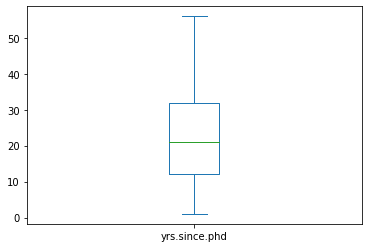

In [10]:
data['yrs.since.phd'].plot.box()

<AxesSubplot:>

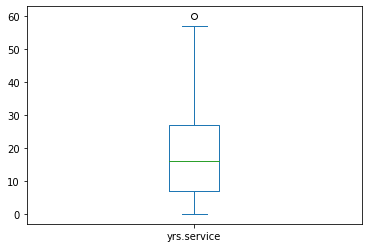

In [11]:
data['yrs.service'].plot.box()

yrs.since.phd       AxesSubplot(0.125,0.125;0.227941x0.755)
yrs.service      AxesSubplot(0.398529,0.125;0.227941x0.755)
salary           AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

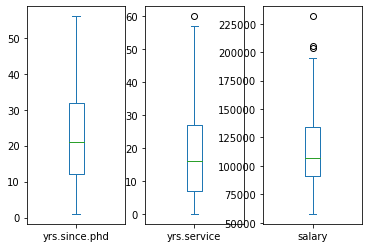

In [22]:
#data.plot?
data.plot(kind='box',subplots='true',layout=(1,3))

Visualize data

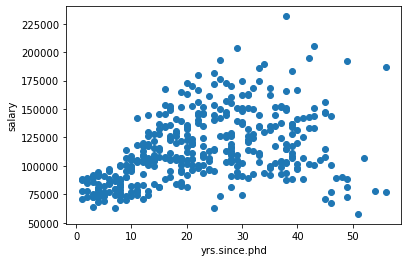

In [29]:
plt.scatter(data['yrs.since.phd'],data['salary'])
plt.xlabel('yrs.since.phd')
plt.ylabel('salary')
plt.show()

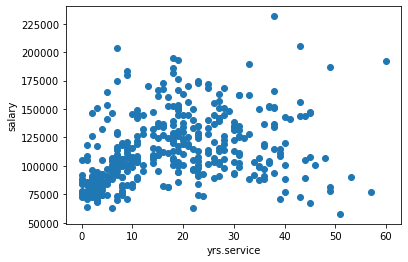

In [31]:
plt.scatter(data['yrs.service'],data['salary'])
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.show()

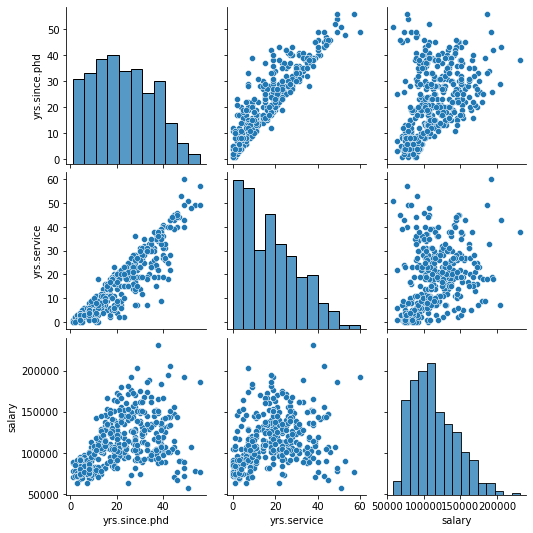

In [32]:
sns.pairplot(data)

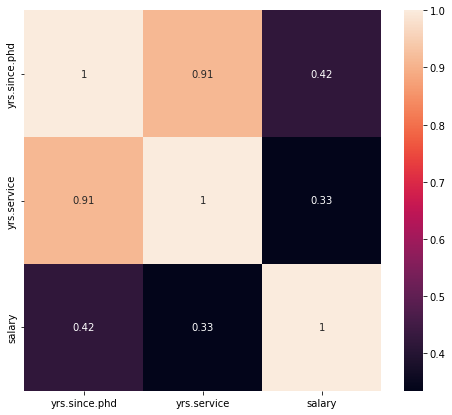

In [33]:
#plt.figure?
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [34]:
data.shape

(397, 6)

In [ ]:
#drop discipline
data.drop('discipline',axis=1,inplace=True)

In [43]:
data.head()

,rank,yrs.since.phd,yrs.service,sex,salary
0,Prof,19,18,Male,139750
1,Prof,20,16,Male,173200
2,AsstProf,4,3,Male,79750
3,Prof,45,39,Male,115000
4,Prof,40,41,Male,141500


In [44]:
#drop the rank
data.drop('rank',axis=1,inplace=True)

In [45]:
# rank dropped
data.head()

,yrs.since.phd,yrs.service,sex,salary
0,19,18,Male,139750
1,20,16,Male,173200
2,4,3,Male,79750
3,45,39,Male,115000
4,40,41,Male,141500


In [46]:
# drop the sex
data.drop('sex',axis=1,inplace=True)

In [47]:
# sex dropped 
data.head()

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


In [48]:
data.shape

(397, 3)

In [49]:
x=data.iloc[:,0:-1]
x.head()

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41


In [50]:
y=data.iloc[:,-1]
y.head

<bound method NDFrame.head of 0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64>

In [51]:
x.shape

(397, 2)

In [52]:
y.shape

(397,)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [54]:
x_train.shape

(265, 2)

In [55]:
y_train.shape

(265,)

In [56]:
x_test.shape

(132, 2)

In [57]:
y_test.shape

(132,)

In [58]:
lm=LinearRegression()

In [59]:
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.coef_

array([1485.32956566, -417.74965095])

In [61]:
lm.intercept_

88288.22048497465

In [62]:
data.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [63]:
lm.score(x_train,y_train)

0.21660696796389167

In [65]:
#predict the value
pred=lm.predict(x_test)
print("Predicted Result salary:",pred)
print("Actual salary:",y_test)

Predicted Result salary: [106112.17527287 116416.63634359  96179.02953886  98314.18936826
 123425.53452093  99753.10735928 126071.26715057  89773.55005063
 101934.67876333 124028.95321004 107504.65894965 129691.75654563
 120269.20635146 112703.32379925 124353.85697211  96828.85980261
 136422.16253553  98917.60805738 142734.79613488  92558.54014379
 104858.92632001 120269.20635146 127788.67732902 108989.9885153
 110846.65615728 104487.58824369  92326.45953099  93394.0394457
 133822.84148053 108943.57694067 106019.32938399 110846.65615728
 130666.51331106 113678.05782507 118969.54582395 119897.86827514
 136329.31664665 109639.81877905 105369.49912024 147654.94605744
 116138.14415616 123425.53452093 106994.08614941 106808.41711126
 130898.59392386 112285.5741483  111125.14834471 136004.41288458
 137814.64621231 112610.47791037 111960.64764662  97896.43971731
 128438.53033237 101052.76788678 116323.81319431  91258.87961629
 100031.59954672 107458.24737501 107086.90929869  94693.6999732
 12

In [66]:
print('error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute Error: 20302.327331491062
Mean Squared Error: 718142637.9116423
Root Squared Error: 26798.183481565356


In [67]:
#r2 score coefficient of determination
# is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#ie change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.10560537986572549


In [68]:
pred

array([106112.17527287, 116416.63634359,  96179.02953886,  98314.18936826,
       123425.53452093,  99753.10735928, 126071.26715057,  89773.55005063,
       101934.67876333, 124028.95321004, 107504.65894965, 129691.75654563,
       120269.20635146, 112703.32379925, 124353.85697211,  96828.85980261,
       136422.16253553,  98917.60805738, 142734.79613488,  92558.54014379,
       104858.92632001, 120269.20635146, 127788.67732902, 108989.9885153 ,
       110846.65615728, 104487.58824369,  92326.45953099,  93394.0394457 ,
       133822.84148053, 108943.57694067, 106019.32938399, 110846.65615728,
       130666.51331106, 113678.05782507, 118969.54582395, 119897.86827514,
       136329.31664665, 109639.81877905, 105369.49912024, 147654.94605744,
       116138.14415616, 123425.53452093, 106994.08614941, 106808.41711126,
       130898.59392386, 112285.5741483 , 111125.14834471, 136004.41288458,
       137814.64621231, 112610.47791037, 111960.64764662,  97896.43971731,
       128438.53033237, 1

In [69]:
diff=y_test-pred

In [71]:
df=pd.DataFrame(np.c_[y_test, pred, diff],columns=['Actual','predicted','difference'])

In [72]:
df

,Actual,predicted,difference
0,105000.0,106112.175273,-1112.175273
1,107100.0,116416.636344,-9316.636344
2,63100.0,96179.029539,-33079.029539
3,90215.0,98314.189368,-8099.189368
4,100131.0,123425.534521,-23294.534521
...,...,...,...
127,108100.0,105323.087546,2776.912454
128,146800.0,118458.973024,28341.026976
129,118971.0,110707.398694,8263.601306
130,163200.0,109639.818779,53560.181221


In [73]:
df.to_csv('salary_prediction_submission.csv') 